# **MONKEYPOX CLASIFICATION**
### Un programa para la clasificación de casos con la viruela del mono
### DATASET Disponible en: https://www.kaggle.com/datasets/nafin59/monkeypox-skin-lesion-dataset




In [1]:
#@title Montando el Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


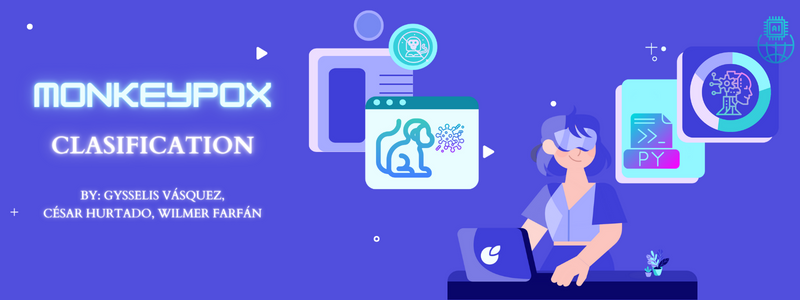

In [93]:
#@title **Proyecto Final Inteligencia Artificial I**
from IPython.display import Image
Image("/content/drive/MyDrive/PROYECTO IA/ImagenesPres/Banner IA.png")

## **Cargar las Recursos Necesarios**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#@title Cargando las Librerías
import numpy as np 
import cv2
import os
import time
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten, Dropout, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *
from PIL import Image
from google.colab.patches import cv2_imshow

In [4]:
#@title Cargando Detalles del Dataset
dataset = pd.read_csv("/content/drive/MyDrive/PROYECTO IA/Monkeypox_Dataset_metadata.csv", sep=",")
type(dataset)
dataset

,ImageID,Label
0,M01_01,Monkeypox
1,M01_02,Monkeypox
2,M01_03,Monkeypox
3,M01_04,Monkeypox
4,M02_01,Monkeypox
...,...,...
223,NM106_01,Non Monkeypox
224,NM107_01,Non Monkeypox
225,NM108_01,Non Monkeypox
226,NM109_01,Non Monkeypox


## **Presentación del Dataset Utilizado**

In [5]:
#@title **Mostrando detalles del dataset**
print(dataset.describe)

a = pd.unique(dataset['Label'])
print(a)
b = dataset.count()
print(b)

<bound method NDFrame.describe of       ImageID          Label
0      M01_01      Monkeypox
1      M01_02      Monkeypox
2      M01_03      Monkeypox
3      M01_04      Monkeypox
4      M02_01      Monkeypox
..        ...            ...
223  NM106_01  Non Monkeypox
224  NM107_01  Non Monkeypox
225  NM108_01  Non Monkeypox
226  NM109_01  Non Monkeypox
227  NM110_01  Non Monkeypox

[228 rows x 2 columns]>
['Monkeypox' 'Non Monkeypox']
ImageID    228
Label      228
dtype: int64


## **Caracterización del Dataset**

> **Clases:** Cuenta con dos clases que corresponden a: 
"Monkeypox", con 102 imágenes originales y "Others" (Lesiones cutáneas provocadas por varicela y sarampión), con 126 imágenes originales.

>Se destinarán para cada fase los siguientes datos:


>> **Train**

>> 1.   Monkeypox: 980
2.   Others: 1162

>> **Validation**
>> 1.   Monkeypox: 168
2.   Others: 252

>> **Test**
>> 1.   Monkeypox: 20
2.   Others: 25

> En cada uno de estos grupos, se manejan imágenes diferentes del dataset, es decir, las que usan para entrenamiento no están en validación ni en prueba.


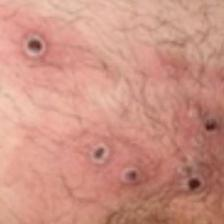

In [6]:
#@title Imagen Original
from IPython.display import Image 
Image("/content/drive/MyDrive/PROYECTO IA/Original Images/Monkey Pox/M01_01.jpg")

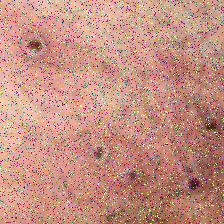

In [7]:
#@title Variación 1: Imagen tipo sal y pimienta
#SAL Y PIMIENTA
Image("/content/drive/MyDrive/PROYECTO IA/Augmented Images/Monkeypox_augmented/M01_01_10.jpg")

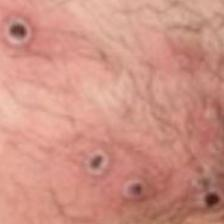

In [8]:
#@title Variación 2
Image("/content/drive/MyDrive/PROYECTO IA/Augmented Images/Monkeypox_augmented/M01_01_13.jpg")

In [9]:
#@title Promedio de las Dos Imágenes
import cv2
import os
a = cv2.imread("/content/drive/MyDrive/PROYECTO IA/Augmented Images/Monkeypox_augmented/M01_01_00.jpg")
b = cv2.imread("/content/drive/MyDrive/PROYECTO IA/Augmented Images/Monkeypox_augmented/M01_01_01.jpg")
c = cv2.add(a,b)

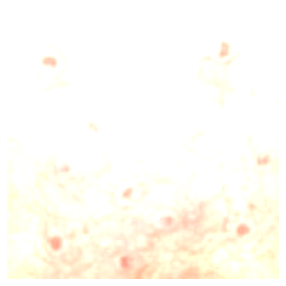

In [10]:
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(c, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [11]:
c = a+b
d = np.array(c)
print ("Media", np.mean(d))
print ("Desviación Estándar", np.std(d))

Media 114.84614158163265
Desviación Estándar 80.86572033784692


In [12]:
print(a.shape)

(224, 224, 3)


(224, 224, 3)


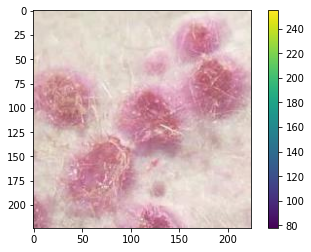

In [13]:
#@title Las que tienen CSV
path = "/content/drive/MyDrive/PROYECTO IA/Original Images/Monkey Pox"
imagen = []
data = pd.DataFrame()

for img in os.listdir(path):
  img = cv2.imread(os.path.join(path, img))
  img_resize = cv2.resize(img, (224, 224))
  img_resize = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  imagen.append(img_resize)

print(imagen[0].shape)
plt.figure()
plt.imshow((imagen[100]))
plt.colorbar()
plt.grid(False)
plt.show()

(224, 224, 3)


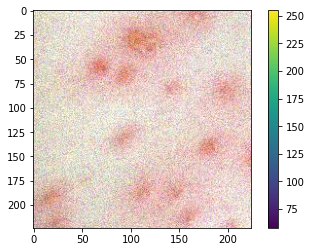

In [14]:
#@title Importando Imágenes con Otras Patologías, para el Entrenamiento 
img_Others_Path = "/content/drive/MyDrive/PROYECTO IA/Fold1/Train/Others"
img_Others = []

for img in os.listdir(img_Others_Path):
    img = cv2.imread(os.path.join(img_Others_Path, img))
    img_resize = cv2.resize(img, (224, 224))
    img_resize = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)
    img_Others.append(img_resize)

print(img_Others[0].shape)
plt.figure()
plt.imshow((img_Others[932]))
plt.colorbar()
plt.grid(False)
plt.show()

## **SEGUNDA ENTREGA**



In [15]:
#@title Pre procesamiento y extracción de características
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

inicio = time.time()

X = [] # Imágenes
y = [] # Label: -> si es 1 es viruela de mono, 0 si es otro tipo de lesión cutánea
data = pd.DataFrame()

img_Train_Path = "/content/drive/MyDrive/PROYECTO IA/Fold1/Train/Monkeypox"

# Se realiza el proceso de lectura de imágenes con viruela del mono, asignando el valor de 1
for img in os.listdir(img_Train_Path):
    img = cv2.imread(os.path.join(img_Train_Path, img))
    img_resize = cv2.resize(img, (128, 128))
    img_resize = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)
    X.append(img_resize.flatten())
    y.append(1)

img_Others_Path = "/content/drive/MyDrive/PROYECTO IA/Fold1/Train/Others"

# Se realiza el proceso de lectura de imágenes con otras patologías distintas, asignando el valor de 0
for img in os.listdir(img_Others_Path):
    img = cv2.imread(os.path.join(img_Others_Path, img))
    img_resize = cv2.resize(img, (128, 128))
    img_resize = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)
    X.append(img_resize.flatten())
    y.append(0)

#------------------------------------------------------------------------------
img_valMonkey_Path = "/content/drive/MyDrive/PROYECTO IA/Fold1/Val/Monkeypox"
for img in os.listdir(img_valMonkey_Path):
    img = cv2.imread(os.path.join(img_valMonkey_Path, img))
    img_resize = cv2.resize(img, (128, 128))
    img_resize = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)
    X.append(img_resize.flatten())
    y.append(1)

img_valOthers_Path = "/content/drive/MyDrive/PROYECTO IA/Fold1/Val/Others"
for img in os.listdir(img_valOthers_Path):
    img = cv2.imread(os.path.join(img_valOthers_Path, img))
    img_resize = cv2.resize(img, (128, 128))
    img_resize = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)
    X.append(img_resize.flatten())
    y.append(0)

#------------------------------------------------------------------------------
img_TestMonkey_Path = "/content/drive/MyDrive/PROYECTO IA/Fold1/Test/Monkeypox"
for img in os.listdir(img_TestMonkey_Path):
    img = cv2.imread(os.path.join(img_TestMonkey_Path, img))
    img_resize = cv2.resize(img, (128, 128))
    img_resize = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)
    X.append(img_resize.flatten())
    y.append(1)

img_TestOthers_Path = "/content/drive/MyDrive/PROYECTO IA/Fold1/Test/Others"
for img in os.listdir(img_TestOthers_Path):
    img = cv2.imread(os.path.join(img_TestOthers_Path, img))
    img_resize = cv2.resize(img, (128, 128))
    img_resize = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)
    X.append(img_resize.flatten())
    y.append(0)
  
# Convirtiendo las listas de imágenes y labels en arrays de numpy
data = np.array(X)
label = np.array(y)

#Se normalizan las imagenes para que estén dentro de un mismo rango de intensidad de los píxeles
data = data.astype(np.float32)
label = label.astype(np.int32)
data = data/255

fin = time.time()
print("Tiempo Ejecución: %.4f s"%(fin-inicio))

Tiempo Ejecución: 17.6890 s


In [16]:
#@title Permutando los Datos

# Se pasa el mismo parámetro para las dos variables, con el objetivo de que no se pierda la referencia
p = np.random.permutation(range(len(data)))
data = data[p]
label = label[p]

# **Implementando los Métodos de Clasificación**




In [17]:
#@title Usando GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

inicio = time.time()

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, random_state = 21)

estimador = GaussianNB()
estimador.fit(X_train, y_train)
predicciones = estimador.predict(X_train)
sG = cross_val_score(estimador, X_train, y_train, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))

fin = time.time()


print("GaussianNB Accuracy Score: %.4f (+/- %.6f)"%(np.mean(sG), np.std(sG)))

tGNB =fin-inicio

print("Tiempo Ejecución: %.4f s"%(fin-inicio))

GaussianNB Accuracy Score: 0.6430 (+/- 0.034726)
Tiempo Ejecución: 10.8345 s


In [18]:
#@title Usando el Decision Tree
from sklearn.tree import DecisionTreeClassifier
inicio = time.time()

estimador = DecisionTreeClassifier(max_depth=20)

estimador.fit(X_train, y_train)
predicciones = estimador.predict(X_test)

sDT = cross_val_score(estimador, X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
fin = time.time()

print("DecisionTree Accuracy Score: %.4f (+/- %.6f)"%(np.mean(sDT), np.std(sDT)))
tDT = fin-inicio
print("Tiempo Ejecución: %.4f s"%(fin-inicio))

DecisionTree Accuracy Score: 0.7040 (+/- 0.084366)
Tiempo Ejecución: 351.6542 s


In [19]:
#@title Usando Random Forest (feature_importances_)
from sklearn.ensemble import RandomForestClassifier
inicio = time.time()

estimador = RandomForestClassifier()

estimador.fit(X_train, y_train)
predicciones = estimador.predict(X_test)

sRF = cross_val_score(estimador, X_test, y_test, cv=KFold(12, shuffle=True), scoring=make_scorer(accuracy_score))
fin = time.time()

print("RandomForest Accuracy Score: %.4f (+/- %.6f)"%(np.mean(sRF), np.std(sRF)))
tRF = fin-inicio
print("Tiempo Ejecución: %.4f s"%(tRF))

RandomForest Accuracy Score: 0.8110 (+/- 0.036597)
Tiempo Ejecución: 124.3304 s


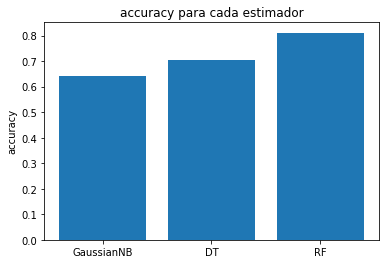

In [20]:
#@title Comparación de Resultados Previos
estimadores = ["GaussianNB", "DT", "RF"]
accuracy = [np.mean(sG), np.mean(sDT), np.mean(sRF)]
fig, ax = plt.subplots()
ax.set_ylabel('accuracy')
ax.set_title('accuracy para cada estimador')
plt.bar(estimadores, accuracy)
plt.show()

In [21]:
#@title Usando Support Vector Machine (SVM)

from sklearn.svm import SVC

inicio = time.time()

estimador = SVC(kernel='poly')
estimador.fit(X_train, y_train)

predicciones = estimador.predict(X_test)
sPoly = cross_val_score(estimador, X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
fin = time.time()

print("SVC Accuracy Score: %.4f (+/- %.6f)"%(np.mean(sPoly), np.std(sPoly)))
tpoly = fin - inicio
print("Tiempo Ejecución: %.4f s"%(tpoly))

SVC Accuracy Score: 0.8199 (+/- 0.049472)
Tiempo Ejecución: 242.6470 s


In [23]:
#@title Usando Support Vector Machine (SVM)

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
inicio = time.time()

estimador = make_pipeline(StandardScaler(), SVC(gamma='auto'))
estimador = SVC(kernel='poly')

estimador.fit(X_train, y_train)

predicciones = estimador.predict(X_test)
sPolyEst = cross_val_score(estimador, X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
fin = time.time()

print("SVC Accuracy Score: %.4f (+/- %.6f)"%(np.mean(sPolyEst), np.std(sPolyEst)))
tpolyStan = fin-inicio
print("Tiempo Ejecución: %.4f s"%(tpolyStan))

SVC Accuracy Score: 0.8404 (+/- 0.035426)
Tiempo Ejecución: 241.0116 s


In [24]:
#@title Usando Support Vector Machine (SVM)
from sklearn.svm import SVC
inicio = time.time()

estimador = SVC(kernel='rbf')

estimador.fit(X_train, y_train)

predicciones = estimador.predict(X_test)
sRBF = cross_val_score(estimador, X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
fin = time.time()

print("SVC Accuracy Score: %.4f (+/- %.6f)"%(np.mean(sRBF), np.std(sRBF)))
tRBF = fin - inicio
print("Tiempo Ejecución: %.4f s"%(tRBF))

SVC Accuracy Score: 0.7394 (+/- 0.050527)
Tiempo Ejecución: 366.2565 s


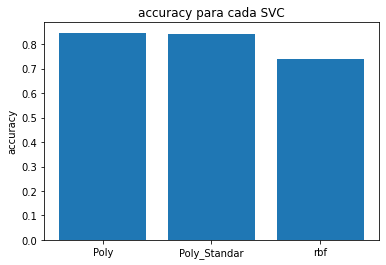

In [25]:
#@title Comparación de Resultados Previos en SVC
estimadores = ["Poly", "Poly_Standar", "rbf"]
accuracy = [np.mean(sPoly), np.mean(sPolyEst), np.mean(sRBF)]
fig, ax = plt.subplots()
ax.set_ylabel('accuracy')
ax.set_title('accuracy para cada SVC')
plt.bar(estimadores, accuracy)
plt.show()

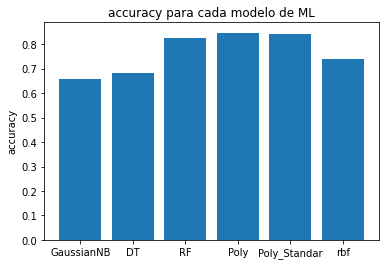

In [26]:
#@title Comparación Modelos ML en Accuracy
estimadores = ["GaussianNB", "DT", "RF", "Poly", "Poly_Standar", "rbf"]
accuracy = [np.mean(sG), np.mean(sDT), np.mean(sRF), np.mean(sPoly), np.mean(sPolyEst), np.mean(sRBF)]
fig, ax = plt.subplots()
ax.set_ylabel('accuracy')
ax.set_title('accuracy para cada modelo de ML')
plt.bar(estimadores, accuracy)
plt.show()

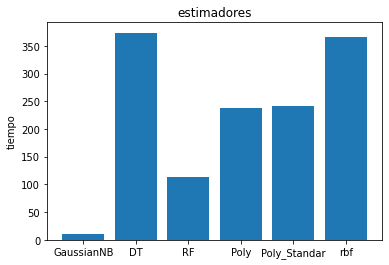

In [27]:
#@title Comparación Modelos de ML en Tiempo de Ejecución
estimadores = ["GaussianNB", "DT", "RF", "Poly", "Poly_Standar", "rbf"]
tiempo = [tGNB, tDT, tRF, tpoly, tpolyStan, tRBF]
fig, ax = plt.subplots()
ax.set_ylabel('tiempo')
ax.set_title('estimadores')
plt.bar(estimadores, tiempo)
plt.show()

# **IMPLEMENTACIÓN EN DEEP LEARNING**

In [27]:
#@title Importando Librerías
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2.11.0


In [28]:
#@title Lectura de la ubicación de las Imágenes y Clasificación por Carpetas
path =  r'/content/drive/MyDrive/PROYECTO IA/All Images'
folders = os.listdir(path)
print(folders)

['Monkeypox', 'Others']


In [29]:
Monkeypox = sorted(os.listdir(path +'/Monkeypox'))
Others =  sorted(os.listdir(path +'/Others'))

#Cantidad de imágenes que se tienen de cada clase
print("Cantidad de Imágenes:")
print("Monkeypox =", len(Monkeypox))
print("Others =", len(Others))

Cantidad de Imágenes:
Monkeypox = 1168
Others = 1439


In [30]:
# Definición de las listas para X y (y)
images = [] #X
labels = [] #y


# Se realiza el proceso de lectura de imágenes con viruela del mono, asignando el valor de 1
for m in Monkeypox:
  try:
    img = cv2.imread(path + '/Monkeypox/' + m) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img, (128,128))
    
    images.append(np.array(resized))
    labels.append(1)

  except AttributeError:
    print('')


# Se realiza el proceso de lectura de imágenes con otras patologías distintas, asignando el valor de 0
for o in Others:
  try:
    img = cv2.imread(path + '/Others/' + o) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img, (128,128))
    
    images.append(np.array(resized))
    labels.append(0)

  except AttributeError:
    print('')

In [31]:
# Conversión a arrays de numpy
images = np.array(images)
labels = np.array(labels)

In [32]:
print('Imagenes : {} | Labels : {}'.format(images.shape , labels.shape))

Imagenes : (2607, 128, 128, 3) | Labels : (2607,)


In [33]:
#@title Función de Clasificación por Nombres
def pox_type(imagen):
  if imagen == 0: 
    typed = 'Others'
  if imagen == 1: 
    typed = 'Monkeypox'
  return typed

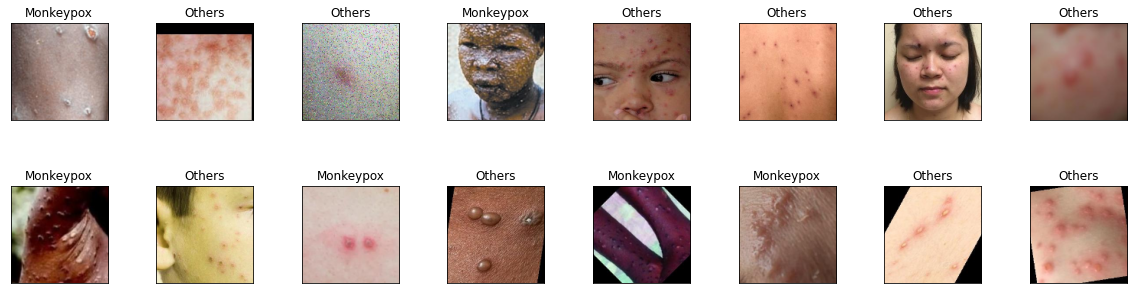

In [34]:
#@title Previsualización del Dataset
plt.figure(1, figsize=(20,5))
n = 0

for i in range(16):
  n += 1
  r = np.random.randint(0, images.shape[0], 1)
  plt.subplot(2, 8, n) # Numero de filas y cantidad de columnas de la grafica
  plt.subplots_adjust(hspace = 0.5, wspace =0.5)
  plt.imshow(images[r[0]])
  plt.title('{}'.format(pox_type(labels[r[0]]), labels[r[0]]))
  plt.xticks([]), plt.yticks([])

plt.show()

In [35]:
#@title Permutación de los Datos
p = np.random.permutation(range(len(images)))
imagenes = images[p]
labels = labels[p]

In [36]:
#@title Split para Entrenamiento y Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 111)

In [37]:
# Redimensionamiento de las Imágenes
X_train = X_train.reshape([-1, 128, 128, 3])
X_test = X_test.reshape([-1, 128, 128, 3])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.keras.utils.to_categorical(y_train) 

X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print('Numero de imagenes en x_train', X_train.shape, "y_train:", y_train.shape)
print('Numero de imagenes in x_test', X_test.shape, "y_test: ", y_test.shape)

# y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
# print(y_train.shape)

x_train shape: (2085, 128, 128, 3)
Numero de imagenes en x_train (2085, 128, 128, 3) y_train: (2085, 2)
Numero de imagenes in x_test (522, 128, 128, 3) y_test:  (522, 2)


## Modelo DNN

In [38]:
#@title Ejecución del Modelo DNN
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[128, 128, 3]), 
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(2048, activation=tf.nn.relu),
    tf.keras.layers.Dense(4096, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.sigmoid) 
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_5 (Dense)             (None, 512)               25166336  
                                                                 
 dense_6 (Dense)             (None, 1024)              525312    
                                                                 
 dense_7 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_8 (Dense)             (None, 4096)              8392704   
                                                                 
 dense_9 (Dense)             (None, 2)                 8194      
                                                                 
Total params: 36,191,746
Trainable params: 36,191,746


In [39]:
# Compilador
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.015),
              metrics=['accuracy'])

In [40]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.988 ):
      print("\nReached 98.7% accuracy so cancelling training!")
      self.model.stop_training = True

In [41]:
#@title Entrenamiento del Modelo DNN
inicio = time.time()

callbacks = myCallback()
history = model.fit(X_train,y_train, batch_size = 64, epochs=30,  validation_split = 0.2,
                    callbacks = callbacks,
                    verbose=1, shuffle=True)

fin = time.time()
tDNN = fin - inicio
print("\n\nTiempo Ejecución: %.4f s"%(tDNN))

Epoch 1/30
27/27 [==============================] - 4s 37ms/step - loss: 6.9168 - accuracy: 0.5486 - val_loss: 7.1121 - val_accuracy: 0.5588
Epoch 2/30
27/27 [==============================] - 1s 23ms/step - loss: 7.1217 - accuracy: 0.5582 - val_loss: 7.1121 - val_accuracy: 0.5588
Epoch 3/30
27/27 [==============================] - 1s 27ms/step - loss: 7.1217 - accuracy: 0.5582 - val_loss: 7.1121 - val_accuracy: 0.5588
Epoch 4/30
27/27 [==============================] - 1s 23ms/step - loss: 7.1217 - accuracy: 0.5582 - val_loss: 7.1121 - val_accuracy: 0.5588
Epoch 5/30
27/27 [==============================] - 1s 25ms/step - loss: 7.1217 - accuracy: 0.5582 - val_loss: 7.1121 - val_accuracy: 0.5588
Epoch 6/30
27/27 [==============================] - 1s 25ms/step - loss: 7.1217 - accuracy: 0.5582 - val_loss: 7.1121 - val_accuracy: 0.5588
Epoch 7/30
27/27 [==============================] - 1s 28ms/step - loss: 7.1217 - accuracy: 0.5582 - val_loss: 7.1121 - val_accuracy: 0.5588
Epoch 8/30
27

In [42]:
test_loss, accDNN = model.evaluate(X_test, y_test)
print('Test accuracy:', accDNN)

17/17 [==============================] - 0s 6ms/step - loss: 7.6268 - accuracy: 0.5268
Test accuracy: 0.5268199443817139


## Con una Red Convolucional

In [44]:
#@title Ejecución del Modelo Convolucional
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.AveragePooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 average_pooling2d (AverageP  (None, 63, 63, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 256)       73984     
                                                                 
 average_pooling2d_1 (Averag  (None, 30, 30, 256)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 512)       1180160   
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 512)     

In [45]:
# Compilador
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
              metrics=['accuracy'])

In [46]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.988 ):
            print("\nReached 98.7% accuracy so cancelling training!")
            self.model.stop_training = True

In [47]:
#@title Entrenamiento del Modelo Convolucional
inicio = time.time()

callbacks = myCallback()
history = model.fit(X_train,y_train, batch_size = 64, epochs=30,  validation_split = 0.2,
                    callbacks = callbacks,
                    verbose=1, shuffle=True)

fin = time.time()
tConv = fin - inicio
print("\n\nTiempo Ejecución: %.4f s"%(tConv))

Epoch 1/30
 6/27 [=====>........................] - ETA: 2s - loss: 78777.3828 - accuracy: 0.4844

27/27 [==============================] - 15s 170ms/step - loss: 18145.1875 - accuracy: 0.5252 - val_loss: 0.6886 - val_accuracy: 0.5588
Epoch 2/30
27/27 [==============================] - 4s 134ms/step - loss: 16.6816 - accuracy: 0.5570 - val_loss: 0.6867 - val_accuracy: 0.5588
Epoch 3/30
27/27 [==============================] - 4s 142ms/step - loss: 0.6885 - accuracy: 0.5582 - val_loss: 0.6863 - val_accuracy: 0.5588
Epoch 4/30
27/27 [==============================] - 4s 140ms/step - loss: 0.6871 - accuracy: 0.5582 - val_loss: 0.6862 - val_accuracy: 0.5588
Epoch 5/30
27/27 [==============================] - 4s 140ms/step - loss: 0.6878 - accuracy: 0.5582 - val_loss: 0.6866 - val_accuracy: 0.5588
Epoch 6/30
27/27 [==============================] - 4s 141ms/step - loss: 0.6889 - accuracy: 0.5582 - val_loss: 0.6863 - val_accuracy: 0.5588
Epoch 7/30
27/27 [==============================] - 4s 144ms/step - loss: 0.6881 - accuracy: 0.5582 - val_loss: 0.6862 - val_accuracy: 0.5588
Epoch 8/30


In [48]:
loss, accConv = model.evaluate(X_train, y_train)
loss, accConv

66/66 [==============================] - 2s 22ms/step - loss: 0.6866 - accuracy: 0.5583


(0.6866148710250854, 0.5582733750343323)

In [52]:
loss, accConv = model.evaluate(X_test, y_test)
loss, accConv

17/17 [==============================] - 0s 22ms/step - loss: 0.6955 - accuracy: 0.5268


(0.695465624332428, 0.5268199443817139)

# **RESULTADOS FINALES**

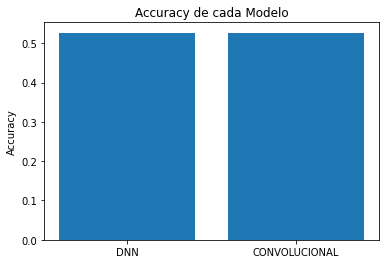

In [53]:
#@title Resultados Finales en Cuanto a Accuracy
modelos = ["DNN", "CONVOLUCIONAL"]
accuracy = [np.mean(accDNN), np.mean(accConv)]
fig, ax = plt.subplots()
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy de cada Modelo')
plt.bar(modelos, accuracy)
plt.show()

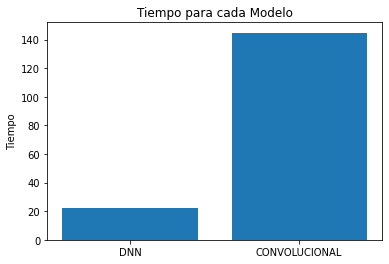

In [54]:
#@title Resultados Finales en Cuanto a Tiempo de Ejecución
modelos = ["DNN", "CONVOLUCIONAL"]
tiempo = [np.mean(tDNN), np.mean(tConv)]
fig, ax = plt.subplots()
ax.set_ylabel('Tiempo')
ax.set_title('Tiempo para cada Modelo')
plt.bar(modelos, tiempo)
plt.show()